<a href="https://colab.research.google.com/github/Dyakonov/Colab/blob/main/dj_CLUSTERexperimentsN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Эксперименты с частичными преобразованиями
делаю проекциюб используя только часть данных

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1176a18d21b966e409050f046c1e39d90ddc2545d2dbd3b23885595b284d0001
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=bdde4af6f0f2c9c82cf9c7eaa160bfed91e0cae2d5b81dab34159b520a6eb18e
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
# import warnings
# warnings.filterwarnings("ignore")
# pd.set_option('display.max_columns', None)
import matplotlib as mpl
plt.rc('font', size=14)

# импорт библиотек

from time import time
from tqdm.autonotebook import tqdm
import numpy as np
import torch

# from datasets import load_dataset

import umap

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics  import fowlkes_mallows_score
from sklearn.metrics  import adjusted_mutual_info_score
from sklearn.metrics  import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  del sys.path[0]


In [ ]:
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#np.save('/content/drive/My Drive/clusterdata/X_save', X)
#np.save('/content/drive/My Drive/clusterdata/y_save', y)
X = np.load('/content/drive/My Drive/clusterdata/X_save.npy')
y = np.load('/content/drive/My Drive/clusterdata/y_save.npy')

In [ ]:
X.shape, y.shape

((15250, 768), (15250,))

In [ ]:
!pip install datasets
from datasets import load_dataset
data = load_dataset("clinc_oos", "plus")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 432 kB 24.1 MB/s 
     |████████████████████████████████| 212 kB 53.8 MB/s 
     |████████████████████████████████| 115 kB 64.8 MB/s 
     |████████████████████████████████| 163 kB 63.7 MB/s 
     |████████████████████████████████| 127 kB 61.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Generating train split:   0%|          | 0/15250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

Dataset clinc_oos downloaded and prepared to /root/.cache/huggingface/datasets/clinc_oos/plus/1.0.0/abcc41d382f8137f039adc747af44714941e8196e845dfbdd8ae7a7e020e6ba1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# data['train']['text']

<BarContainer object of 3 artists>

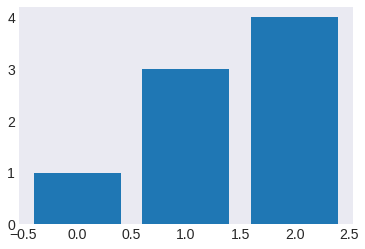

In [ ]:
lst = list(Counter([3,2,2,2,1,1,1,1]).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

In [ ]:
lst

[1, 3, 4]

In [ ]:
2000 / 15250

0.13114754098360656

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.868, random_state=42) # random_state=42,  ЕСЛИ СДЕЛАТЬ ТАК... shuffle=False , random_state=42
indexes = np.arange(X.shape[0])
indexes_train, indexes_test = train_test_split(indexes, test_size=0.868, random_state=42)

In [ ]:
print (f'число кластеров = {len(np.unique(y_train))}, {len(np.unique(y_test))}')
print (f'размеры = {X_train.shape}, {X_test.shape}')

число кластеров = 151, 151
размеры = (2013, 768), (13237, 768)


#  k-Means на train

k-Means на train
V=0.903, H=0.899, C=0.907, NC=151, FM=0.6731, MI=0.8141, RS=0.6702, T=12.951


<BarContainer object of 151 artists>

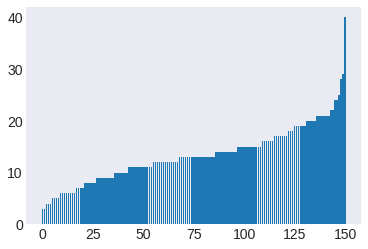

In [ ]:
l = 151
t0 = time()
model = KMeans(n_clusters=l)
clustering_emb = model.fit(X_train)
a = clustering_emb.labels_

V = v_measure_score(y_train, a)
H =homogeneity_score(y_train, a)
C = completeness_score(y_train, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_train, a)
MI = adjusted_mutual_info_score(y_train, a)
RS = adjusted_rand_score(y_train, a)
T = time() - t0

print ("k-Means на train")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
#V=0.9316, H=0.9262, C=0.937, NC=151, FM=0.7856, MI=0.9172, RS=0.7829, T=75.3756
# V=0.8992, H=0.8947, C=0.9037, NC=151, FM=0.667, MI=0.8071, RS=0.664, T=12.1723

lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

In [ ]:
for i in np.nonzero(a==1)[0]:
  print (f'class={int(y[indexes_train[i]])}, text=' + data['train']['text'][indexes_train[i]])

class=126, text=do i have enough pto to take time off
class=140, text=how much longer till the next day off
class=126, text=how much time do i have for vacation saved
class=148, text=how many days off did i use so far
class=148, text=can you tell me how much pto i've gone through
class=126, text=how many days for vacation do i have left
class=148, text=count the number of vacation days i've taken and tell me
class=148, text=can you count for me the total number of days off i have used
class=126, text=what's the number of remaining vacation days i have
class=126, text=i'd like to know how many vacation days i have
class=126, text=how many vacation days do i have left this year
class=148, text=how many days have i taken off so far
class=126, text=i want to know how many vacation days i can use
class=148, text=how many times have i used my annual leave
class=140, text=how soon is my next day off
class=148, text=what's the amount of time i've taken off work this year
class=148, text=whats 

# k-Means на test

k-Means на test
V=0.8845, H=0.8738, C=0.8956, NC=151, FM=0.6664, MI=0.8612, RS=0.6606, T=1.0484


<BarContainer object of 151 artists>

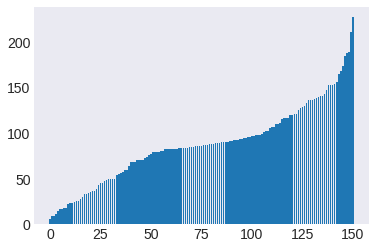

In [ ]:
t0 = time()

#clustering_emb = model.predict(X_test)
a = model.predict(X_test)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("k-Means на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
# V=0.9324, H=0.925, C=0.9399, NC=150, FM=0.7541, MI=0.8714, RS=0.7503, T=0.1557
# V=0.8859, H=0.8752, C=0.8969, NC=151, FM=0.6645, MI=0.8627, RS=0.6582, T=0.5053

lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

In [ ]:
for i in np.nonzero(a==1)[0]:
  print (f'class={int(y[indexes_test[i]])}, text=' + data['train']['text'][indexes_test[i]])

class=126, text=how many day of my vacation are left for the year
class=101, text=was my day off request approved
class=126, text=can you tell me the remaining time i have for pto
class=148, text=what's the total of days i've taken for me time so far
class=148, text=how many vacation days have i used
class=148, text=how much time did i take off so far
class=126, text=how many vacation days do i have to spend
class=148, text=tell me my usage of vacation days
class=148, text=find out for me how many days off i have taken in total at this point
class=148, text=how many days off have i had this year
class=148, text=what's the amount of time off i've had
class=126, text=how many vacation days do i have saved
class=148, text=how many days of pto have i used
class=140, text=i need to know when i get my next day off
class=148, text=so far, how many days off have i taken
class=126, text=let me know the number of vacation days i have
class=126, text=how many days can i slack off this year
class=

# UMAP (train) + k-Means (train) на train

UMAP (train) + k-Means (train) на train
V=0.9047, H=0.8982, C=0.9113, NC=151, FM=0.6896, MI=0.8187, RS=0.6859, T=19.0304


<BarContainer object of 151 artists>

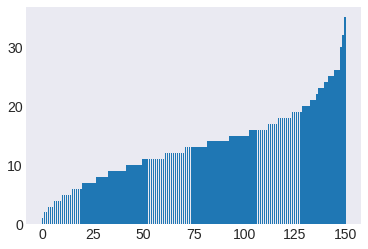

In [ ]:
l = 151
t0 = time()

reducer = umap.UMAP(n_neighbors=32, min_dist=0.1, n_components=2, metric='euclidean') # 16 -> 2
embedding = reducer.fit_transform(X_train)
model = KMeans(n_clusters=l)
clustering_emb = model.fit(embedding)
a = clustering_emb.labels_

V = v_measure_score(y_train, a)
H =homogeneity_score(y_train, a)
C = completeness_score(y_train, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_train, a)
MI = adjusted_mutual_info_score(y_train, a)
RS = adjusted_rand_score(y_train, a)
T = time() - t0

print ("UMAP (train) + k-Means (train) на train")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")

#
# V=0.9145, H=0.9057, C=0.9235, NC=151, FM=0.7028, MI=0.8384, RS=0.6983, T=18.6316

lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

In [ ]:
for i in np.nonzero(a==2)[0]:
  print (f'class={int(y[indexes_train[i]])}, text=' + data['train']['text'][indexes_train[i]])

class=72, text=how do i get to the train on foot
class=24, text=i gotta know what the traffic is like on the way to phoenix
class=78, text=how long does it take to get to phoenix by bus
class=78, text=how far is the grand canyon from my current location in phoenix, az
class=72, text=what's the direction for foot traffic to get to the eiffel tower
class=24, text=is the traffic bad on the way to work
class=72, text=what steps do i need to take to take a bus to detroit
class=24, text=what's the traffic like on the way to walmart
class=24, text=how will traffic be at 7am on the way to my job
class=24, text=i would like to know the traffic in tempe please
class=24, text=i must know what the traffic is like on the way to phoenix
class=24, text=is there traffic up ahead
class=24, text=what will traffic be like at 5:00 going towards the mall
class=24, text=how is the traffic near lexington
class=24, text=is there any traffic on my way to work
class=24, text=i need ti know the traffic in tempe


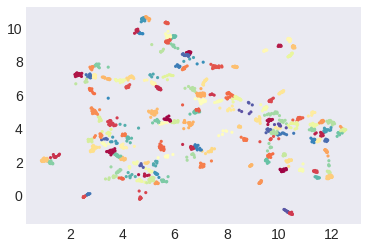

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], 10, a, lw=0.01, edgecolor='w', cmap='Spectral')

# UMAP (train) + k-Means (train) на test

UMAP (train) + k-Means (train) на test
V=0.7861, H=0.7783, C=0.7941, NC=151, FM=0.4818, MI=0.7419, RS=0.476, T=82.8616


<BarContainer object of 151 artists>

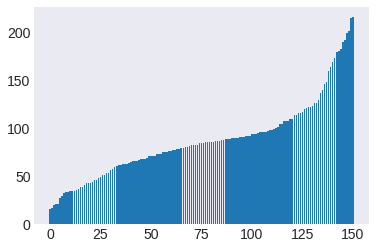

In [ ]:
t0 = time()

embedding = reducer.transform(X_test)
#clustering_emb = KMeans(n_clusters=l).fit(embedding)
#a = clustering_emb.labels_
#clustering_emb = model.predict(X_test)

a = model.predict(embedding)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("UMAP (train) + k-Means (train) на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
#
# V=0.8179, H=0.8075, C=0.8286, NC=151, FM=0.536, MI=0.7811, RS=0.5294, T=239.6494


lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

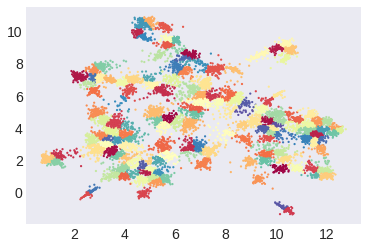

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], 5, a, lw=0.01, edgecolor='w', cmap='Spectral')

In [ ]:
for i in np.nonzero(a==2)[0]:
  print (f'class={int(y[indexes_test[i]])}, text=' + data['train']['text'][indexes_test[i]])

class=24, text=how is the traffic typically at noon on the route to hospital
class=24, text=is traffic bad on the way to chicago
class=78, text=approximately how much time will it take to get to tod's in minutes
class=24, text=is there traffic on dove road
class=72, text=do you know how i get to olympia by bus
class=24, text=will traffic be light on the way to orlando
class=78, text=how long will it take to get to outback in phoenix
class=72, text=i need to know how to get to target by bus
class=24, text=what's the traffic like on the way to the mall
class=72, text=how do i get to the college by bus
class=24, text=is there traffic on route to work
class=24, text=is there traffic on my way to work
class=24, text=what's the traffic like on the way to the amusement park
class=24, text=will i be able to get to the mall at 5:00, or will there be a lot of traffic
class=78, text=if i take the bus, how long will it take to get to dubrovnik
class=24, text=what is the traffic like on the way to 

# "UMAP (train) + k-Means (test) на test"

UMAP (train) + k-Means (test) на test
V=0.7893, H=0.7844, C=0.7942, NC=151, FM=0.486, MI=0.745, RS=0.4816, T=85.2291


<BarContainer object of 151 artists>

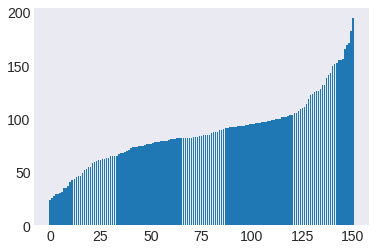

In [ ]:
t0 = time()

embedding = reducer.transform(X_test)
#clustering_emb = KMeans(n_clusters=l).fit(embedding)
#a = clustering_emb.labels_
#clustering_emb = model.predict(X_test)

model.fit(embedding)
a = model.predict(embedding)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("UMAP (train) + k-Means (test) на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
# V=0.9372, H=0.9327, C=0.9417, NC=151, FM=0.7917, MI=0.8797, RS=0.7896, T=35.6992
# V=0.821, H=0.8124, C=0.8297, NC=151, FM=0.5369, MI=0.7843, RS=0.5313, T=240.5687

lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

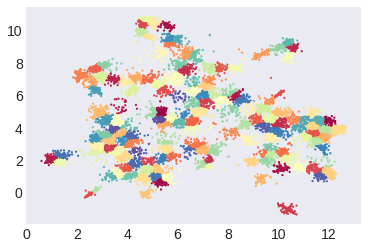

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], 5, a, lw=0.01, edgecolor='w', cmap='Spectral')

In [ ]:
for i in np.nonzero(a==2)[0]:
  print (f'class={int(y[indexes_test[i]])}, text=' + data['train']['text'][indexes_test[i]])

class=14, text=shh please speak with a whisper
class=14, text=please whisper
class=150, text=decrease volume to 4
class=10, text=dim the main lights please
class=14, text=can you change to the whisper voice setting
class=150, text=make the volume 4
class=14, text=i want you to switch to whisper mode
class=14, text=don't make too much noise
class=14, text=go into whisper mode now please
class=14, text=engage whisper mode now
class=10, text=switch fan
class=119, text=speed up your speech
class=10, text=please lock the doors
class=14, text=turn to whisper mode
class=14, text=please turn on whisper mode because i am about to be in class
class=14, text=please switch to whisper mode for now
class=119, text=slow down
class=119, text=reduce your speed of voice
class=14, text=stop using the whisper mode
class=14, text=i need your setting switched to whisper mode right away
class=150, text=please increase your speaker volume
class=150, text=limit your volume
class=119, text=can i get you to talk

# DBSCAN(test) на test

DBSCAN(test) на test
V=0.1942, H=0.1113, C=0.7606, NC=11, FM=0.0882, MI=0.1796, RS=0.0041, T=8.3936


<BarContainer object of 11 artists>

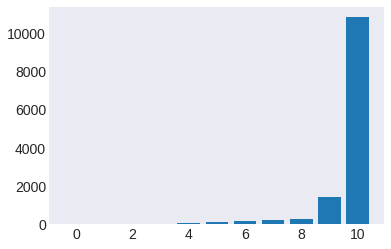

In [ ]:
t0 = time()

model = DBSCAN(eps=0.5, min_samples=20, metric="euclidean") # eps
a = model.fit_predict(X_test)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("DBSCAN(test) на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
#
# V=0.1942, H=0.1113, C=0.7606, NC=11, FM=0.0882, MI=0.1796, RS=0.0041, T=0.079


lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

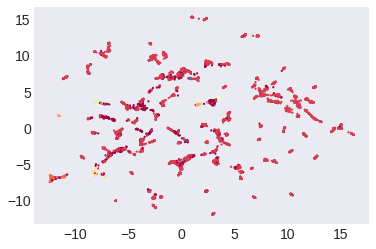

In [ ]:
 # Обучили на DBSCAN, сейчас будем визуализировать - нужен UMAP

reducer = umap.UMAP(n_neighbors=32, min_dist=0.1, n_components=2, metric='euclidean') # 16 -> 2
embedding = reducer.fit_transform(X_test)

plt.scatter(embedding[:,0], embedding[:,1], 5, a, lw=0.01, edgecolor='w', cmap='Spectral')

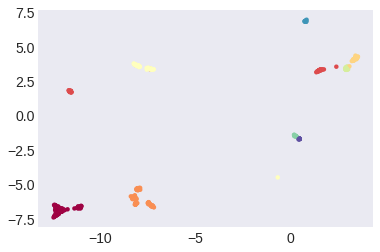

In [ ]:
# НАДО ПОНЯТЬ, ЧТО ЗА КЛАСТЕР a=0
plt.scatter(embedding[a>0,0], embedding[a>0,1], 20, a[a>0], lw=0.01, edgecolor='w', cmap='Spectral')

In [ ]:
for i in np.nonzero(a==6)[0]:
  print (f'class={int(y[indexes_test[i]])}, text=' + data['train']['text'][indexes_test[i]])

class=31, text=how many centimeters are in 4 inches
class=31, text=what would four inches be in centimeters
class=31, text=how do you convert feet to inches
class=31, text=help me convert feet into miles
class=31, text=how many centimeters are one inch
class=31, text=what is inches in centimeters
class=31, text=how would i go about converting inches to yards
class=31, text=i need to know the difference between inches and centimeters
class=31, text=can you convert 2 inches into meters
class=31, text=what is the conversion of inches to centimeters
class=31, text=how many centimeters are in 5 yards
class=31, text=how many centimeters are in an inch
class=31, text=convert inch to cm
class=31, text=please convert 2 inches into meters for me
class=31, text=what's 10 inches in centimeters and millimeters
class=31, text=how many meters are in 10 millimeters
class=31, text=12 feet is equal to how many inches
class=31, text=how do you convert inches to centimeters
class=31, text=whats 5 feet in 

# DBSCAN играемся с параметрами

DBSCAN(test) на test
V=0.5654, H=0.4261, C=0.84, NC=87, FM=0.1343, MI=0.5181, RS=0.0336, T=8.835


<BarContainer object of 87 artists>

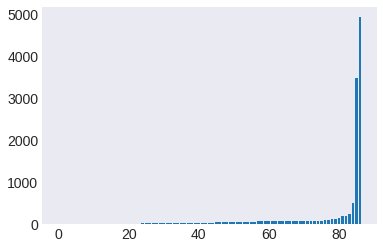

In [ ]:
t0 = time()

model = DBSCAN(eps=0.4, min_samples=10, metric="euclidean") # eps
a = model.fit_predict(X_test)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("DBSCAN(test) на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
#


lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

# eps=0.4, min_samples=20 -  V=0.5136, H=0.3687, C=0.846, NC=64, FM=0.1207, MI=0.4676, RS=0.0232, T=9.082
# eps=0.4, min_samples=10 - V=0.5654, H=0.4261, C=0.84, NC=87, FM=0.1343, MI=0.5181, RS=0.0336, T=8.835

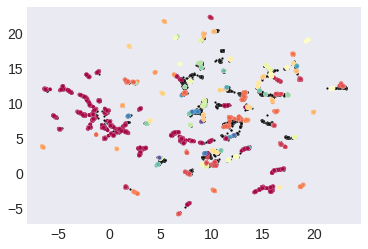

In [ ]:
 # Обучили на DBSCAN, сейчас будем визуализировать - нужен UMAP

reducer = umap.UMAP(n_neighbors=32, min_dist=0.1, n_components=2, metric='euclidean') # 16 -> 2
embedding = reducer.fit_transform(X_test)

plt.scatter(embedding[a<0,0], embedding[a<0,1], 5, color='black', lw=0.1, edgecolor='w', cmap='Spectral')
plt.scatter(embedding[a>=0,0], embedding[a>=0,1], 15, a[a>=0], lw=0.1, edgecolor='w', cmap='Spectral')

In [ ]:
sum(a==14)

129

In [ ]:
for i in np.nonzero(a==15)[0]:
  print (f'class={int(y[indexes_test[i]])}, text=' + data['train']['text'][indexes_test[i]])

class=136, text=use the map and pinpoint my position
class=75, text=what would your name be
class=77, text=where you from the usa
class=11, text=you have what name for me
class=99, text=how old are you, again
class=75, text=what do you want me to refer to you as
class=11, text=what name do you call me by
class=11, text=what name do you call me
class=136, text=where am i located
class=96, text=can you tell me who made ai
class=75, text=do you have a name i can use
class=136, text=what's my current location
class=11, text=what is the name you call me saved as
class=136, text=what's the precise coordinates of this place
class=96, text=what company manufactured you
class=75, text=what should i refer to you as
class=96, text=ai who made you
class=136, text=can i have my current gps coordinates
class=77, text=what's your birthplace
class=99, text=could you let me know how old you are
class=77, text=can you tell me where you were created
class=77, text=where were you made
class=99, text=when 

# Пробуем OPTICS

OPTICS(test) на test
V=0.3543, H=0.2325, C=0.7445, NC=128, FM=0.0798, MI=0.2647, RS=0.0035, T=159.4433


<BarContainer object of 128 artists>

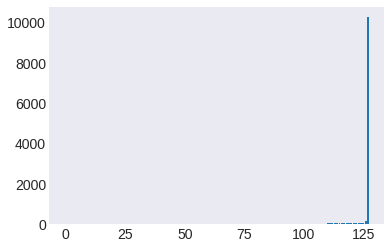

In [ ]:
from sklearn.cluster import OPTICS

t0 = time()

model = OPTICS(max_eps=0.4, min_samples=10, metric="euclidean") # cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, memory=None, n_jobs=None
a = model.fit_predict(X_test)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("OPTICS(test) на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
#
# V=0.3543, H=0.2325, C=0.7445, NC=128, FM=0.0798, MI=0.2647, RS=0.0035, T=159.4433


lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

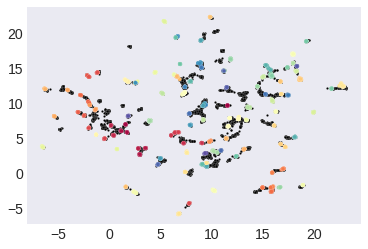

In [ ]:
plt.scatter(embedding[a<0,0], embedding[a<0,1], 5, color='black', lw=0.1, edgecolor='w', cmap='Spectral')
plt.scatter(embedding[a>=0,0], embedding[a>=0,1], 15, a[a>=0], lw=0.1, edgecolor='w', cmap='Spectral')

In [ ]:
for i in np.nonzero(a==4)[0]:
  print (f'class={int(y[indexes_test[i]])}, text=' + data['train']['text'][indexes_test[i]])

class=142, text=how much is this mpg
class=142, text=how much gas does this car use in the city
class=142, text=what is the mpg for this car in city
class=142, text=what is the city fuel efficiency for this car
class=142, text=what's the mpg of this car
class=142, text=do you know what this car's mpg is
class=142, text=what is the highway mpg on this car
class=142, text=how much mpg does this car get in the city
class=142, text=how many miles per gallon does this car get in the city
class=142, text=how does this car do with mpg in the city
class=142, text=what is the mpg on this car
class=142, text=what's the miles per gallon on this car
class=142, text=how many mpg does this car have
class=142, text=please tell me what the mpg is for this car
class=142, text=what is the city mpg for this car
class=142, text=what kind of mpg does this car get in the city
class=142, text=for city driving, what's the car's mpg
class=142, text=what is the mpg like for this car while driving in the city
cl

# Пока конец

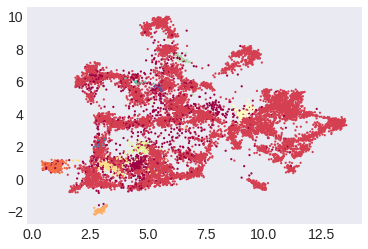

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], 5, a, lw=0.01, edgecolor='w', cmap='Spectral')

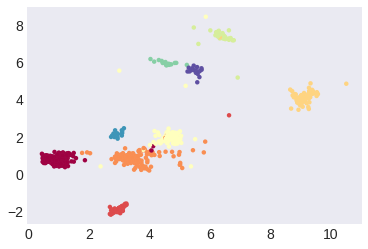

In [ ]:
plt.scatter(embedding[a>0,0], embedding[a>0,1], 20, a[a>0], lw=0.01, edgecolor='w', cmap='Spectral')


In [ ]:
sum(a==0)

10825

In [ ]:
l = 151
t0 = time()

# м.б. коментировать
reducer = umap.UMAP(n_neighbors=32, min_dist=0.1, n_components=16, metric='euclidean')
reducer.fit(X_train)
embedding = reducer.transform(X_test)

model = DBSCAN(eps=0.1, min_samples=20, metric="euclidean") # eps =
a = model.fit_predict(embedding)

V = v_measure_score(y_test, a)
H =homogeneity_score(y_test, a)
C = completeness_score(y_test, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y_test, a)
MI = adjusted_mutual_info_score(y_test, a)
RS = adjusted_rand_score(y_test, a)
T = time() - t0

print ("UMAP(train) + DBSCAN(test) на test")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
# eps = 0.5
# V=0.1795, H=0.1, C=0.8757, NC=9, FM=0.0879, MI=0.1649, RS=0.0029, T=254.6293

UMAP(train) + DBSCAN(test) на test
V=0.1581, H=0.0894, C=0.6817, NC=33, FM=0.0785, MI=0.1149, RS=0.0009, T=253.5118


In [ ]:
a = model.predict(embedding)

AttributeError: ignored

In [ ]:
np.unique(clustering_emb)

array([KMeans(n_clusters=151)], dtype=object)

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Эксперименты с кластеризацией без разбивки

k-Means на train
V=0.9308, H=0.9264, C=0.9352, NC=151, FM=0.798, MI=0.9179, RS=0.7959, T=88.7416


<BarContainer object of 151 artists>

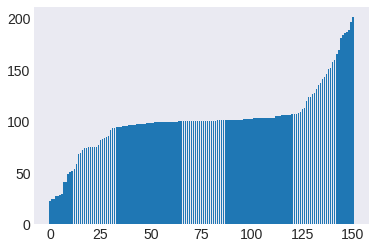

In [ ]:
l = 151
t0 = time()
model = KMeans(n_clusters=l)
clustering_emb = model.fit(X)
a = clustering_emb.labels_

V = v_measure_score(y, a)
H =homogeneity_score(y, a)
C = completeness_score(y, a)
NC = len(np.unique(a))
FM = fowlkes_mallows_score(y, a)
MI = adjusted_mutual_info_score(y, a)
RS = adjusted_rand_score(y, a)
T = time() - t0

print ("k-Means на train")
print (f"V={np.round(V, 4)}, H={np.round(H, 4)}, C={np.round(C, 4)}, NC={np.round(NC, 4)}, FM={np.round(FM, 4)}, MI={np.round(MI, 4)}, RS={np.round(RS, 4)}, T={np.round(T, 4)}")
#V=0.9316, H=0.9262, C=0.937, NC=151, FM=0.7856, MI=0.9172, RS=0.7829, T=75.3756
# V=0.8992, H=0.8947, C=0.9037, NC=151, FM=0.667, MI=0.8071, RS=0.664, T=12.1723

lst = list(Counter(a).values())
lst.sort()
plt.bar(np.arange(len(lst)), lst)

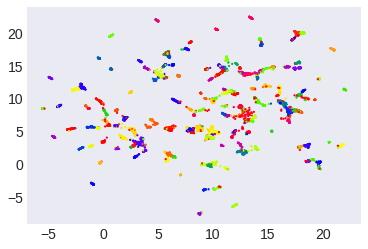

In [ ]:
reducer = umap.UMAP(n_neighbors=32, min_dist=0.1, n_components=2, metric='euclidean') # 16 -> 2
embedding = reducer.fit_transform(X)

plt.scatter(embedding[:,0], embedding[:,1], 5, a, lw=0.01, edgecolor='w', cmap='prism')

In [ ]:
data['train']['text'][a==1]

TypeError: ignored

In [ ]:
for i in np.nonzero(a==1)[0]:
  print (f'class={int(y[i])}, text=' + data['train']['text'][i])

class=39, text=can i get a car to the baseball field for 12
class=40, text=i want to reserve a convertible from july 2nd through july 18th for los angeles
class=40, text=i'd like to rent a vehicle from nov 1st to nov 15th in san antonio and i need a 15 passenger van
class=40, text=i want to rent the cheapest car for charlottesville, virginia for march 7th through 10th, that's monday, tuesday, wednesday and thursday
class=40, text=i'd like to reserve a high-end car that seats 5 comfortably for april 12th through 18th for st louis missouri
class=40, text=i need a van that seats 8 or more for new york city, august 12th, 13th, and 14th
class=40, text=a rental car needs to be booked in nashville
class=40, text=book me a car rental in nashville
class=40, text=please help me book a rental car for nashville
class=40, text=i need you to get me a rental car in nashville
class=40, text=in nashville, i need a rental car booked
class=40, text=where can i rent a car in boston
class=40, text=i need t

In [ ]:
i=0
data['train']['text'][i]

'what expression would i use to say i love you if i were an italian'

In [ ]:
data['train']['text'][0]

'what expression would i use to say i love you if i were an italian'